# LINEAR REGRESSION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('ex1data1.txt', header = None)
X = data[0].to_numpy().reshape(-1,1)
y = data[1].to_numpy().reshape(-1,1)

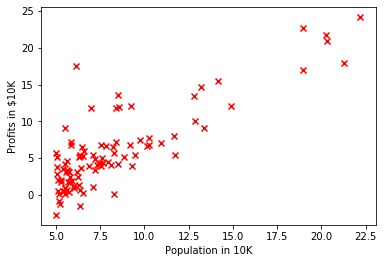

In [3]:
fig, ax = plt.subplots(1,1)

ax.set_xlabel('Population in 10K')
ax.set_ylabel('Profits in $10K')
ax.scatter(X,y,marker='x',color='red')
plt.show()

## 1. Linear Regression with one feature set

### Cost, Gradient and Gradient Descent functions

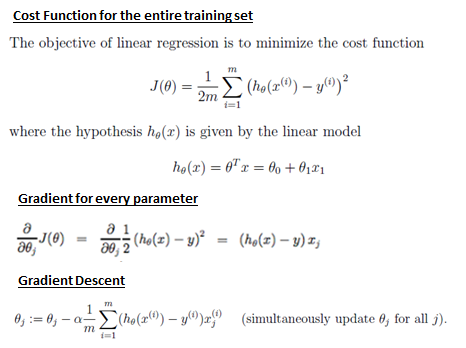

In [4]:
from IPython.display import Image
Image(filename = "D:\Python_Work\Machine_Learning\Coursera\Exercises\Linear_Regression\LR.png")

In [5]:
def cost_grad(theta, X, y):
    m,n = X.shape
    h = X.dot(theta)
    error = h - y
    J = (1/(2*m)) * sum(error**2)
    G = (1/m) * (X.T.dot(error))
    return J, G

def grad_descent(theta, X, y, alpha, num_iter):    
    for i in range(num_iter):
        J, G = cost_grad(theta, X, y)
        theta = theta - (alpha * G)
    return J, theta


### Calculation for the given single feature data set

In [6]:
# Inputs
m,n = X.shape
X_upd = np.append(np.ones([m,1]), X, axis=1)
m,n = X_upd.shape
theta = np.zeros([n,1])

# Finding cost and gradient for zero parameters
J, G = cost_grad(theta, X_upd, y)
print(f'The cost function for initial theta parameters is {round(J[0],2)}.')

# Finding minimum cost and accurate parameters
J_min, theta_final = grad_descent(theta, X_upd, y, alpha = 0.01, num_iter = 1500)
print(f'\nResults of Gradient Descent:\
\n1. The minimum cost, J_min = {round(J_min[0],2)}.\
\n2. The parameters are {round(theta_final[0][0],4)} and {round(theta_final[1][0],4)}.')

The cost function for initial theta parameters is 32.07.

Results of Gradient Descent:
1. The minimum cost, J_min = 4.48.
2. The parameters are -3.6303 and 1.1664.


### Plotting the Regression Line

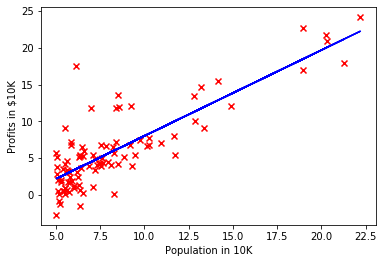

In [7]:
X = data[0].to_numpy().reshape(-1,1)
y = data[1].to_numpy().reshape(-1,1)
h = X_upd.dot(theta_final)

fig, ax = plt.subplots(1,1)
ax.scatter(X,y,marker='x',color='red')
ax.plot(X, h, color='blue')

ax.set_xlabel('Population in 10K')
ax.set_ylabel('Profits in $10K')

plt.show()

### Predicting Housing Prices

In [8]:
# Predict housing prices for a population of 35,000 and 70,000 (Divide by 10K for calculations)

inp = np.array([3.5, 7]).reshape(2,1)
X_pred = np.append(np.ones([2,1]), inp, axis=1)
h_pred = X_pred.dot(theta_final)

print(f'The predicted housing prices are:\
\n1. Population 35,000 = $ {round(h_pred[0][0]*10000,2)}\
\n2. Population 70,000 = $ {round(h_pred[1][0]*10000,2)}.')

The predicted housing prices are:
1. Population 35,000 = $ 4519.77
2. Population 70,000 = $ 45342.45.


## 2. Linear Regression with Multiple Feature Sets

### Dataset

In [9]:
data2 = np.genfromtxt('ex1data2.txt', delimiter=',')
print('First column is the size of house, second column the number of bedrooms and third column the price.\
\nThus, the data set has 2 features with the price being predicted.\n')
print(data2[:5])

X = data2[:,:2]  # First 2 columns are the features
y = data2[:,2]   # Last column is the price

First column is the size of house, second column the number of bedrooms and third column the price.
Thus, the data set has 2 features with the price being predicted.

[[2.104e+03 3.000e+00 3.999e+05]
 [1.600e+03 3.000e+00 3.299e+05]
 [2.400e+03 3.000e+00 3.690e+05]
 [1.416e+03 2.000e+00 2.320e+05]
 [3.000e+03 4.000e+00 5.399e+05]]


### Feature Normalisation
<blockquote>It is seen that the scale of magnitude in each of the feature sets is not consistent.<br>
    To bring all feature sets onto the same scale, feature normalisation is done using the formula below:<br><br>
    $X_{norm}  = \frac{X - mean(X)}{SD(X)}$ where SD denotes standard deviation.<br><br>
    <b>The means and standard deviations are column-wise during matrix implementation<br>
    Thus, for the normalised matrix, mean = 0 and SD = 1.</b><br><br>
    Note: Explanation for ddof option: https://stackoverflow.com/questions/27600207/why-does-numpy-std-give-a-different-result-to-matlab-std
    

In [10]:
def feat_norm(X):
    mu = np.mean(X, axis=0)
    sd = np.std(X, axis=0, ddof=1)
    X_norm = (X- mu)/sd
    return X_norm, mu, sd

X_norm, mu, sd = feat_norm(X)
print(f'The mean matrix is:\n{mu}\
\n\nThe standard deviation matrix is:\n{sd}.')

The mean matrix is:
[2000.68085106    3.17021277]

The standard deviation matrix is:
[7.94702354e+02 7.60981887e-01].


### Cost Optimisation and finding parameters

In [11]:
# Inputs
m,n = X_norm.shape
X_upd = np.append(np.ones([m,1]), X_norm, axis=1)
m,n = X_upd.shape
y = y.reshape(-1,1)
theta = np.zeros([n,1])

In [12]:
# Gradient Descent: Modifying function for Cost History

def grad_descent(theta, X, y, alpha, num_iter):  
    J_his = []
    
    for i in range(num_iter):
        J, G = cost_grad(theta, X, y)
        theta = theta - (alpha * G)
        J_his.append(J)
    
    return J_his, theta

In [13]:
J_his_1, theta_final_1 = grad_descent(theta, X_upd, y, alpha=0.01, num_iter=400)
J_his_2, theta_final_2 = grad_descent(theta, X_upd, y, alpha=0.1, num_iter=400)

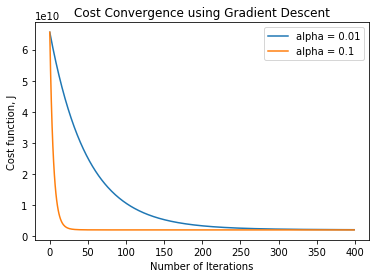

Results of Gradient Descent with alpha = 0.1:
1. The minimum cost, J_min = 2043280050.6.

2. The parameters theta are:
[[340412.65957447]
 [110631.04895815]
 [ -6649.47295013]].


In [14]:
# Cost Convergence Graph

fig, ax = plt.subplots(1,1)
ax.plot(J_his_1, label='alpha = 0.01')
ax.plot(J_his_2, label='alpha = 0.1')
ax.set_title('Cost Convergence using Gradient Descent')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Cost function, J')
ax.legend()
plt.show()

print(f'Results of Gradient Descent with alpha = 0.1:\
\n1. The minimum cost, J_min = {round(J_his_2[-1][0],2)}.\
\n\n2. The parameters theta are:\n{theta_final_2}.')

### Prediction

In [15]:
# Predict housing price for a 1650sqft, 3 bedroom house 
# Do not recalculate mu and sigma. Use the ones already calculated using the training set.

inp = np.array([1650, 3]).reshape(1,2)
inp_norm = (inp-mu)/sd

X_pred = np.append(np.ones([1,1]), inp_norm, axis=1)
h_pred = X_pred.dot(theta_final_2)

print(f'The predicted housing price is: $ {round(h_pred[0][0],2)}.')

The predicted housing price is: $ 293081.46.


## 3. Normal Equation Formulation
<blockquote>Instead of using a numerical method like Gradient Descent, the parameters $\theta$ in a multi-feature setup can be calculated analytically using the following equation:<br><br>
    $\theta$ = $(X^TX)^{-1}X^Ty$<br><br>
    <b>No feature scaling is required while using the normal equation.</b>

In [16]:
X = data2[:,:2]  
y = data2[:,2] 

In [17]:
m,n = X.shape
X_upd = np.append(np.ones([m,1]), X, axis=1)
y = y.reshape(-1,1)

inv_term = np.linalg.inv(X_upd.T.dot(X_upd))
noninv_term = X_upd.T.dot(y)

theta_eq = inv_term.dot(noninv_term)
print(f'The calculated parameters theta are:\n{theta_eq}.')

The calculated parameters theta are:
[[89597.9095428 ]
 [  139.21067402]
 [-8738.01911233]].


In [18]:
# Predict housing price for a 1650sqft, 3 bedroom house 
# Since there is only one training set, mean is calculated using option axis=1.

inp = np.array([1650, 3]).reshape(1,2)

X_pred = np.append(np.ones([1,1]), inp, axis=1)
h_pred = X_pred.dot(theta_eq)

print(f'The predicted housing price is: $ {round(h_pred[0][0],2)}.')

The predicted housing price is: $ 293081.46.
